In [13]:
import numpy as np
import pandas as pd
from src.VolumeAcquisition import LinearVolume, QuadraticVolume, CumulativeLognormalVolume
from src.ProfitModel import StandardModel
from src.PlotFunctions import simple_line_plot, multi_variable_plot

from src.BidOptimizer import StandardBidOptimizer

## Interpreting that I bid the average value, but the value varies from time to time

In [40]:
bid_optim = StandardBidOptimizer(LinearVolume(1, 0.5), [0.1, 0.2, 0.3, 0.4], np.linspace(0.3, 1, 20))

bid_optim.run()

C:\Users\1513 X-MXTI\Documents\Git\lifetime_value_forecasting\src\BidOptimizer.py:67: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.bidding_strategy_data = self.bidding_strategy_data.groupby('sd')['mean_profit', 'std_profit', 'ltv_fraction'].first().reset_index()


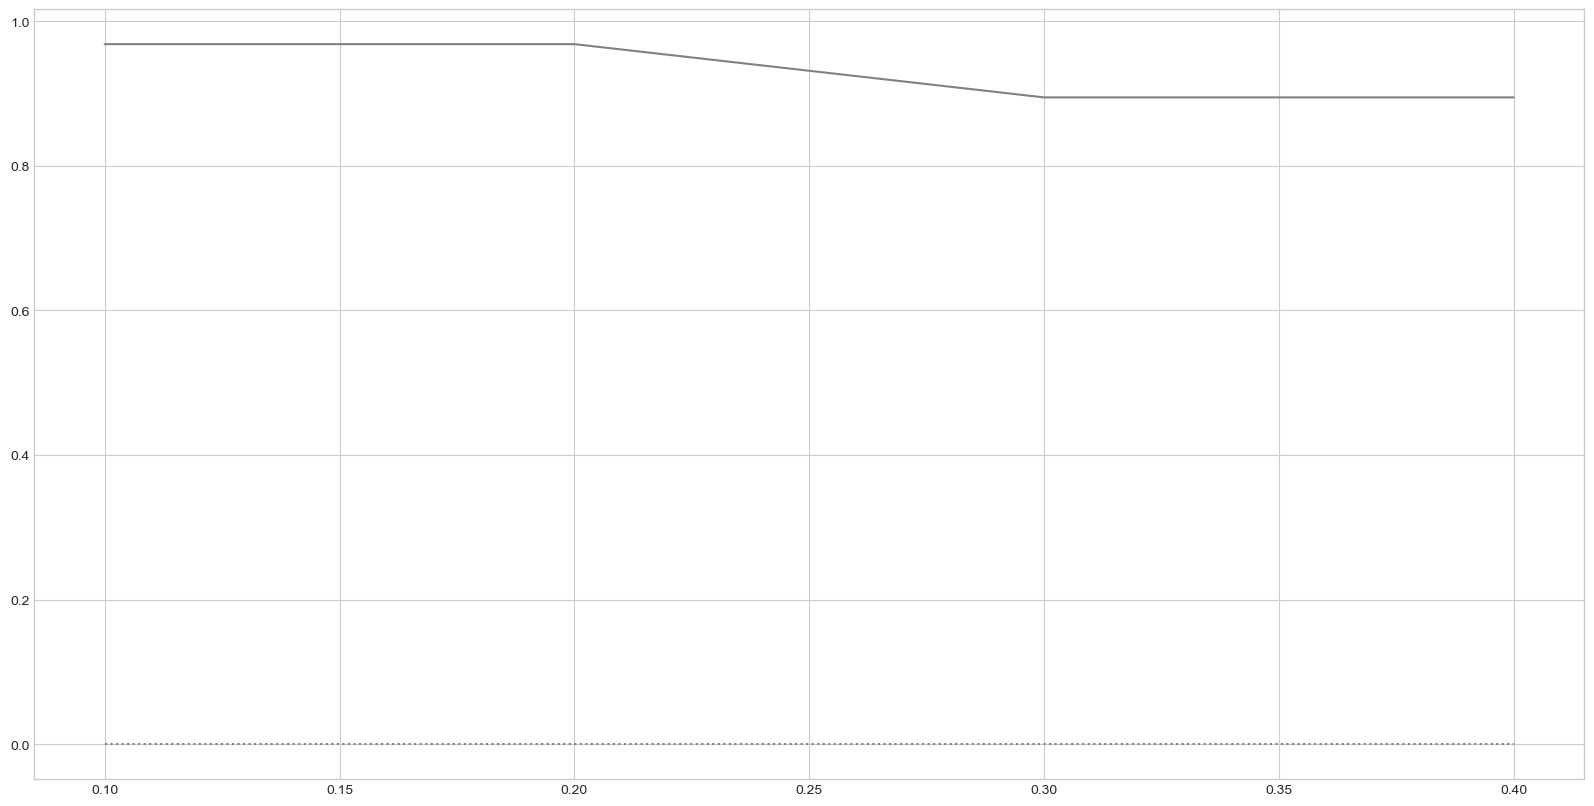

In [41]:
simple_line_plot(bid_optim.bidding_strategy_data, 'sd', 'ltv_fraction')

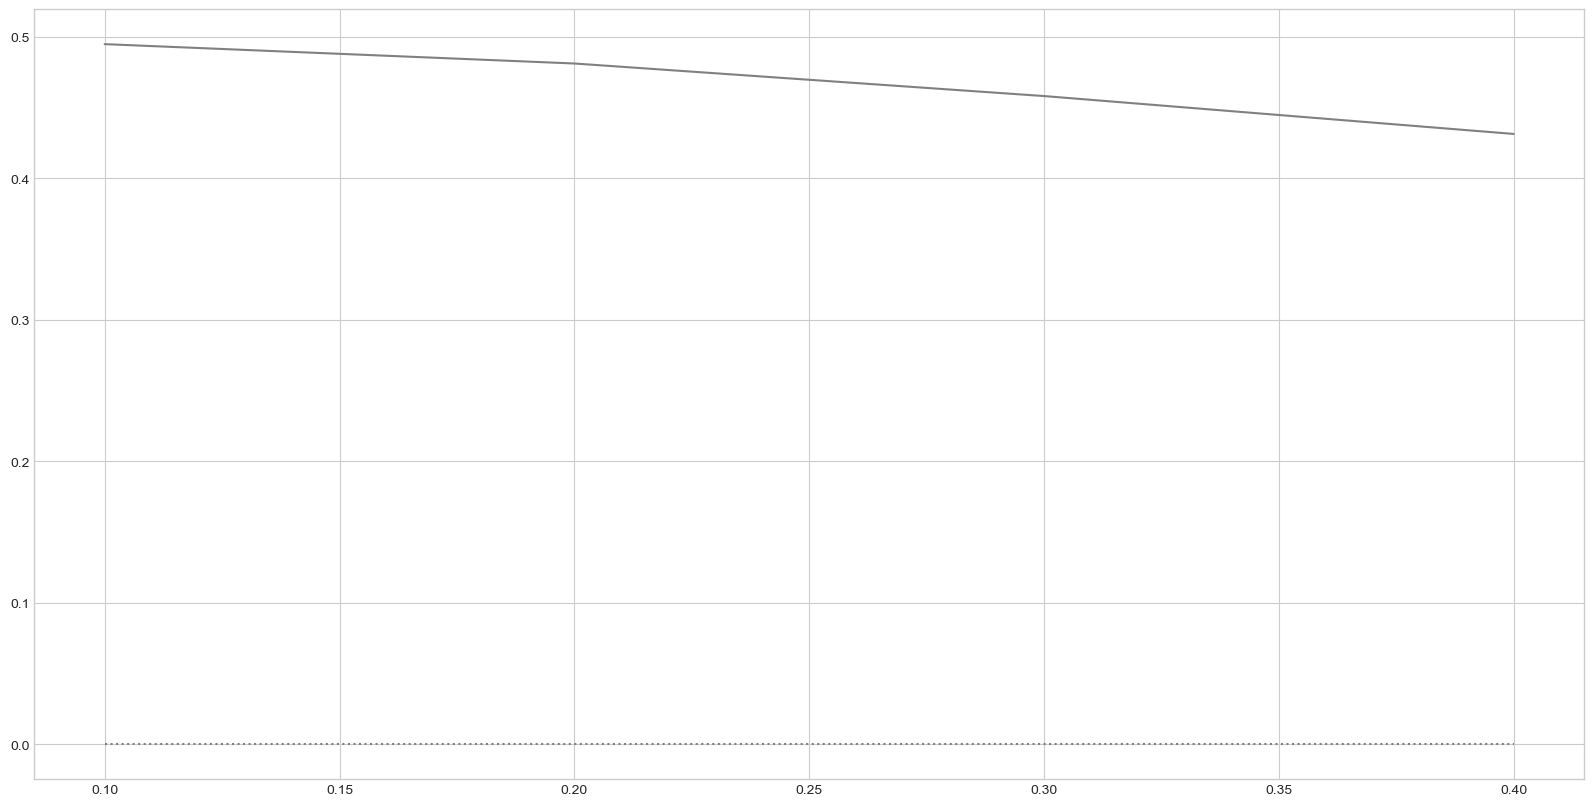

In [42]:
simple_line_plot(bid_optim.bidding_strategy_data, 'sd', 'mean_profit')

# See how optimal bid under uncertainty change depending on the Volume response to CPI 

### Example 1, with same values as the plots for Volume as Example 1 in (Example - Volume by CPI) notebook

In [43]:
avgs = [ 0.5, 1, 1.5, 2.0, 3]
output_data = []
for avg in avgs:
    volume_model = CumulativeLognormalVolume(avg, 1)
    bid_optim = StandardBidOptimizer(volume_model, [0.1, 0.2, 0.3, 0.4], np.linspace(0.3, 1, 20), sample_size=50000)
    bid_optim.run()
    bid_optim.bidding_strategy_data['lognormal_avg'] = avg
    output_data.append(bid_optim.bidding_strategy_data)
    
output_data = pd.concat(output_data)

C:\Users\1513 X-MXTI\Documents\Git\lifetime_value_forecasting\src\VolumeAcquisition.py:37: RuntimeWarning: invalid value encountered in log
  return 0.5 * erfc((self.average - np.log(cpi)) * 0.707107 / self.standard_deviation)
C:\Users\1513 X-MXTI\Documents\Git\lifetime_value_forecasting\src\VolumeAcquisition.py:37: RuntimeWarning: invalid value encountered in log
  return 0.5 * erfc((self.average - np.log(cpi)) * 0.707107 / self.standard_deviation)
C:\Users\1513 X-MXTI\Documents\Git\lifetime_value_forecasting\src\BidOptimizer.py:67: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.bidding_strategy_data = self.bidding_strategy_data.groupby('sd')['mean_profit', 'std_profit', 'ltv_fraction'].first().reset_index()
C:\Users\1513 X-MXTI\Documents\Git\lifetime_value_forecasting\src\VolumeAcquisition.py:37: RuntimeWarning: invalid value encountered in log
  return 0.5 * erfc((self.average - np.log(cpi)) * 0.707

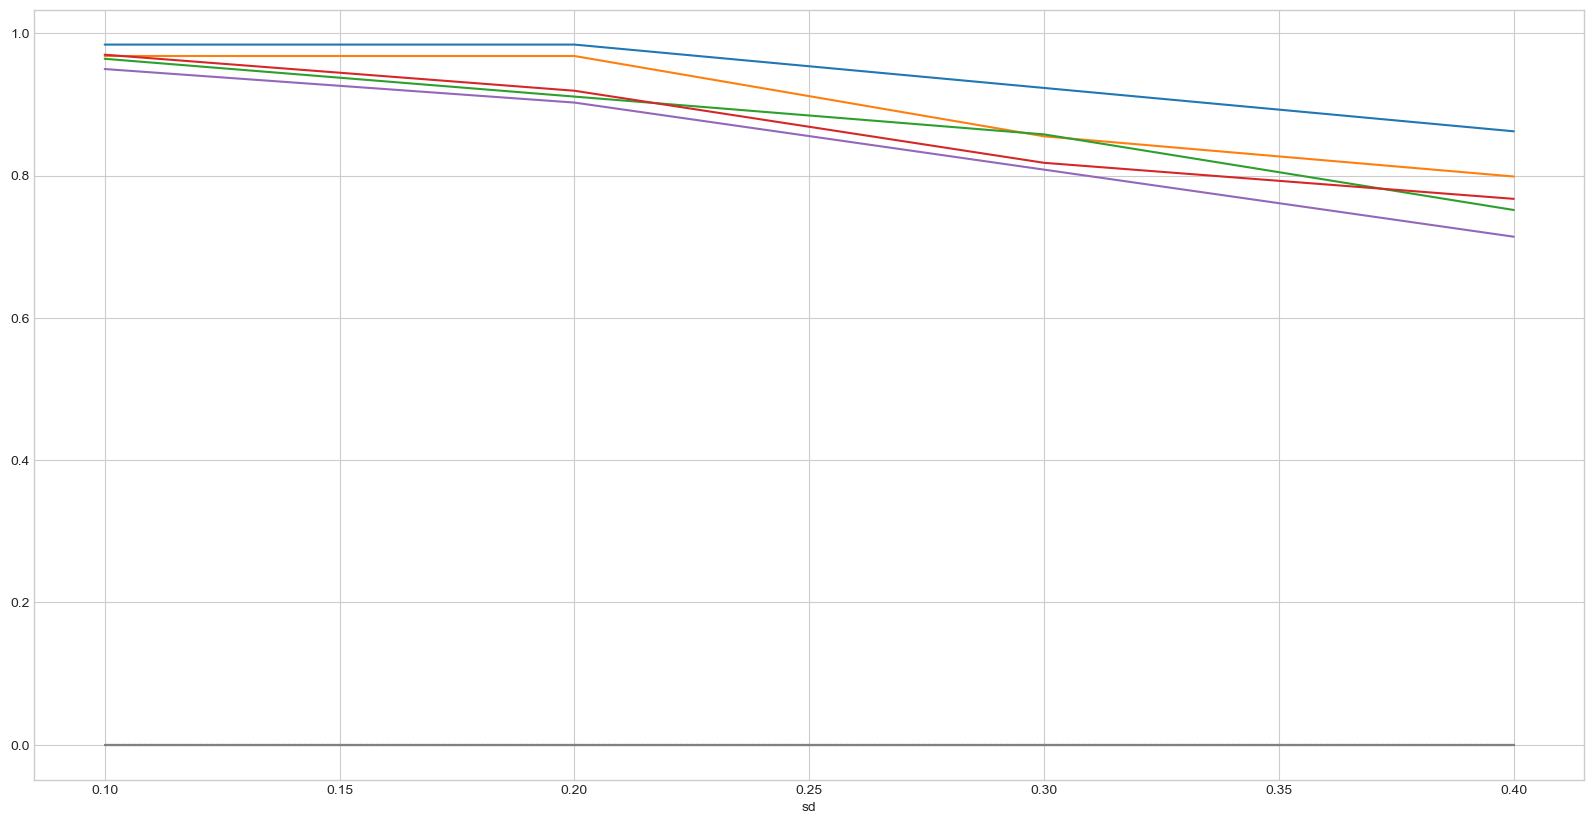

In [44]:
multi_variable_plot(output_data, 'sd', 'lognormal_avg', 'ltv_fraction')

### Example 2, with same values as the plots for Volume as Example 2 in (Example - Volume by CPI) notebook

In [45]:
avgs = [ 0.5, 1, 1.5, 2.0]
output_data = []
for avg in avgs:
    volume_model = CumulativeLognormalVolume(avg, .5)
    bid_optim = StandardBidOptimizer(volume_model, [0.1, 0.2, 0.3, 0.4], np.linspace(0.3, 1, 20), sample_size=50000)
    bid_optim.run()
    bid_optim.bidding_strategy_data['lognormal_avg'] = avg
    output_data.append(bid_optim.bidding_strategy_data)
    
output_data = pd.concat(output_data)

C:\Users\1513 X-MXTI\Documents\Git\lifetime_value_forecasting\src\VolumeAcquisition.py:37: RuntimeWarning: invalid value encountered in log
  return 0.5 * erfc((self.average - np.log(cpi)) * 0.707107 / self.standard_deviation)
C:\Users\1513 X-MXTI\Documents\Git\lifetime_value_forecasting\src\VolumeAcquisition.py:37: RuntimeWarning: invalid value encountered in log
  return 0.5 * erfc((self.average - np.log(cpi)) * 0.707107 / self.standard_deviation)
C:\Users\1513 X-MXTI\Documents\Git\lifetime_value_forecasting\src\BidOptimizer.py:67: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.bidding_strategy_data = self.bidding_strategy_data.groupby('sd')['mean_profit', 'std_profit', 'ltv_fraction'].first().reset_index()
C:\Users\1513 X-MXTI\Documents\Git\lifetime_value_forecasting\src\VolumeAcquisition.py:37: RuntimeWarning: invalid value encountered in log
  return 0.5 * erfc((self.average - np.log(cpi)) * 0.707

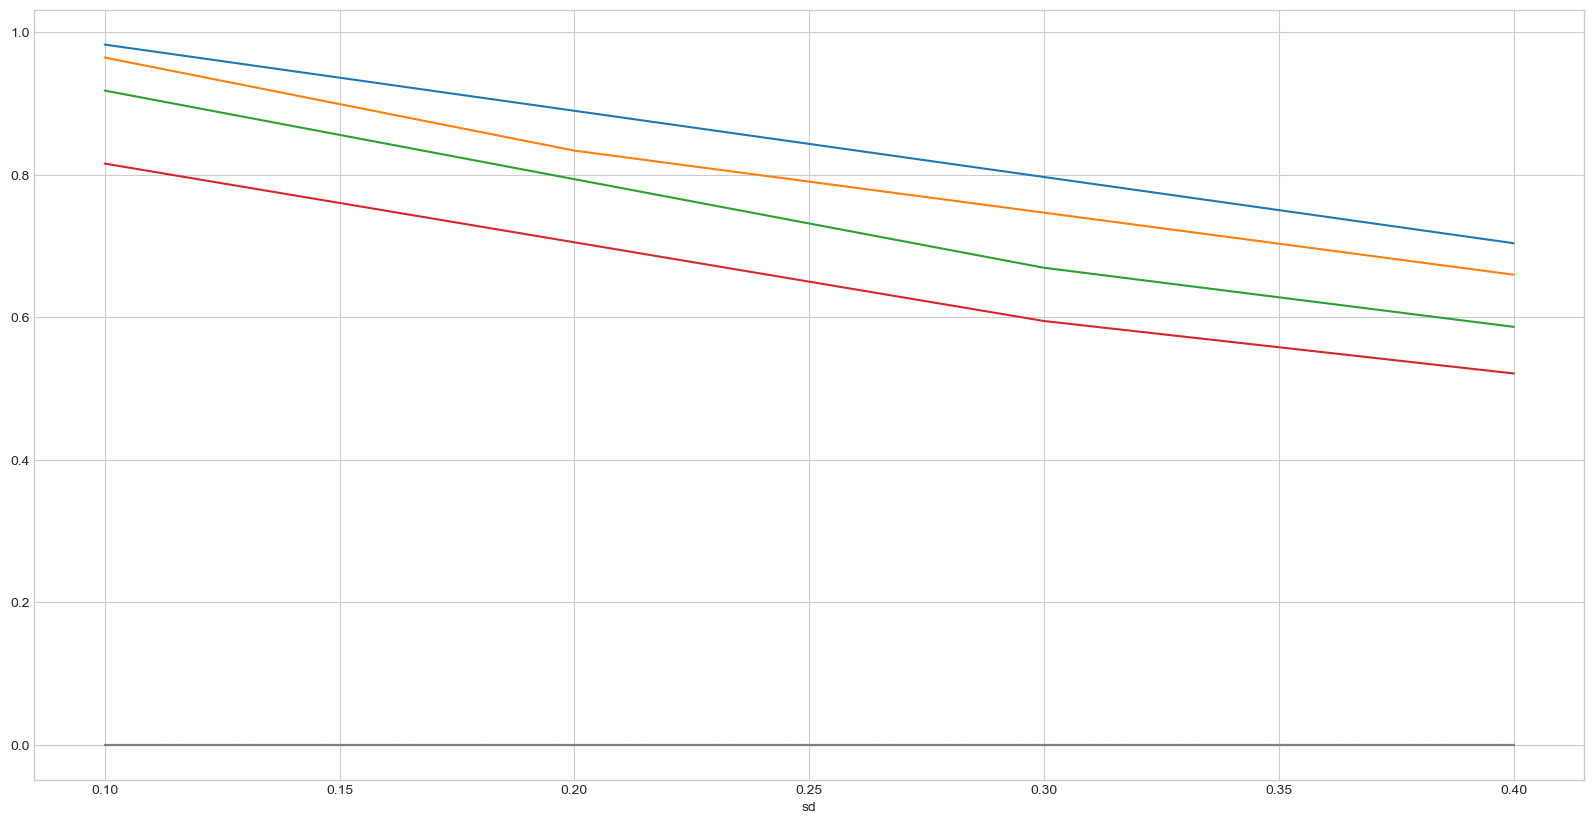

In [46]:
multi_variable_plot(output_data, 'sd', 'lognormal_avg', 'ltv_fraction')